# Factors impacting gross revenue from movies | Correlation 

In [5]:
# Import the libraries that we will be using for the project  

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [7]:
# Import / read the data 

In [8]:
df = pd.read_csv(r"C:\Users\Winta\Documents\Movies correlation  Python project\movies.csv")

In [9]:
# Taking a quick glimpse, we can see that there are 15 features for each instance

In [10]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"Friday, June 13, 1980",146.0,8.4,Jack Nicholson,927000,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"Wednesday, July 2, 1980",104.0,5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"Friday, June 20, 1980",124.0,8.7,Mark Hamill,1200000,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"Wednesday, July 2, 1980",88.0,7.7,Robert Hays,221000,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"Friday, July 25, 1980",98.0,7.3,Chevy Chase,108000,Brian Doyle-Murray,1980


In [11]:
# check for missiing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [12]:
# no missing values we're good to go 

In [13]:
# Check the data types of our features/ columns
df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [14]:
# fix Mismatch between year and year released
# we created a new column, year correct, that takes the last 4 characters from the released column

df['yearcorrect'] = df['released'].astype(str).str[-4:]

In [15]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"Friday, June 13, 1980",146.0,8.4,Jack Nicholson,927000,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"Wednesday, July 2, 1980",104.0,5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"Friday, June 20, 1980",124.0,8.7,Mark Hamill,1200000,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"Wednesday, July 2, 1980",88.0,7.7,Robert Hays,221000,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"Friday, July 25, 1980",98.0,7.3,Chevy Chase,108000,Brian Doyle-Murray,1980,1980


In [16]:
# Sort our table by gross revenue in descending order as Gross revenue is owhat we are intrested in

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [17]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
3733,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"Friday, December 18, 2009",162.0,7.8,Sam Worthington,1100000,James Cameron,2009,2009
5305,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"Friday, April 26, 2019",181.0,8.4,Robert Downey Jr.,903000,Christopher Markus,2019,2019
1797,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"Friday, December 19, 1997",194.0,7.8,Leonardo DiCaprio,1100000,James Cameron,1997,1997
4733,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"Friday, December 18, 2015",138.0,7.8,Daisy Ridley,876000,Lawrence Kasdan,2015,2015
5161,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"Friday, April 27, 2018",149.0,8.4,Robert Downey Jr.,897000,Christopher Markus,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,3000000,Two Prong Lesson,United States,Francesca Gregorini,Drama,5073,Tanner Hall,R,"Thursday, January 15, 2015",96.0,5.8,Rooney Mara,3500,Tatiana von Fürstenberg,2009,2015
1380,5000000,Trimark Pictures,United States,Stephen Cornwell,Action,2970,Philadelphia Experiment II,PG-13,"Saturday, June 4, 1994",97.0,4.5,Brad Johnson,1900,Wallace C. Bennett,1993,1994
2288,5000000,Copperheart Entertainment,Canada,John Fawcett,Drama,2554,Ginger Snaps,Not Rated,"Friday, May 11, 2001",108.0,6.8,Emily Perkins,43000,Karen Walton,2000,2001
154,800000,Embassy Pictures,United States,Charles Band,Horror,2270,Parasite,R,"Friday, March 12, 1982",85.0,3.9,Robert Glaudini,2300,Alan J. Adler,1982,1982


In [18]:
# Check for duplicates

df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
3733,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"Friday, December 18, 2009",162.0,7.8,Sam Worthington,1100000,James Cameron,2009,2009
5305,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"Friday, April 26, 2019",181.0,8.4,Robert Downey Jr.,903000,Christopher Markus,2019,2019
1797,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"Friday, December 19, 1997",194.0,7.8,Leonardo DiCaprio,1100000,James Cameron,1997,1997
4733,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"Friday, December 18, 2015",138.0,7.8,Daisy Ridley,876000,Lawrence Kasdan,2015,2015
5161,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"Friday, April 27, 2018",149.0,8.4,Robert Downey Jr.,897000,Christopher Markus,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,3000000,Two Prong Lesson,United States,Francesca Gregorini,Drama,5073,Tanner Hall,R,"Thursday, January 15, 2015",96.0,5.8,Rooney Mara,3500,Tatiana von Fürstenberg,2009,2015
1380,5000000,Trimark Pictures,United States,Stephen Cornwell,Action,2970,Philadelphia Experiment II,PG-13,"Saturday, June 4, 1994",97.0,4.5,Brad Johnson,1900,Wallace C. Bennett,1993,1994
2288,5000000,Copperheart Entertainment,Canada,John Fawcett,Drama,2554,Ginger Snaps,Not Rated,"Friday, May 11, 2001",108.0,6.8,Emily Perkins,43000,Karen Walton,2000,2001
154,800000,Embassy Pictures,United States,Charles Band,Horror,2270,Parasite,R,"Friday, March 12, 1982",85.0,3.9,Robert Glaudini,2300,Alan J. Adler,1982,1982


# Finding correlations in the Data 

In [20]:
# What features are highly correlated with gross revenue?

In [21]:
# check the correlation between gross revenue and budget 

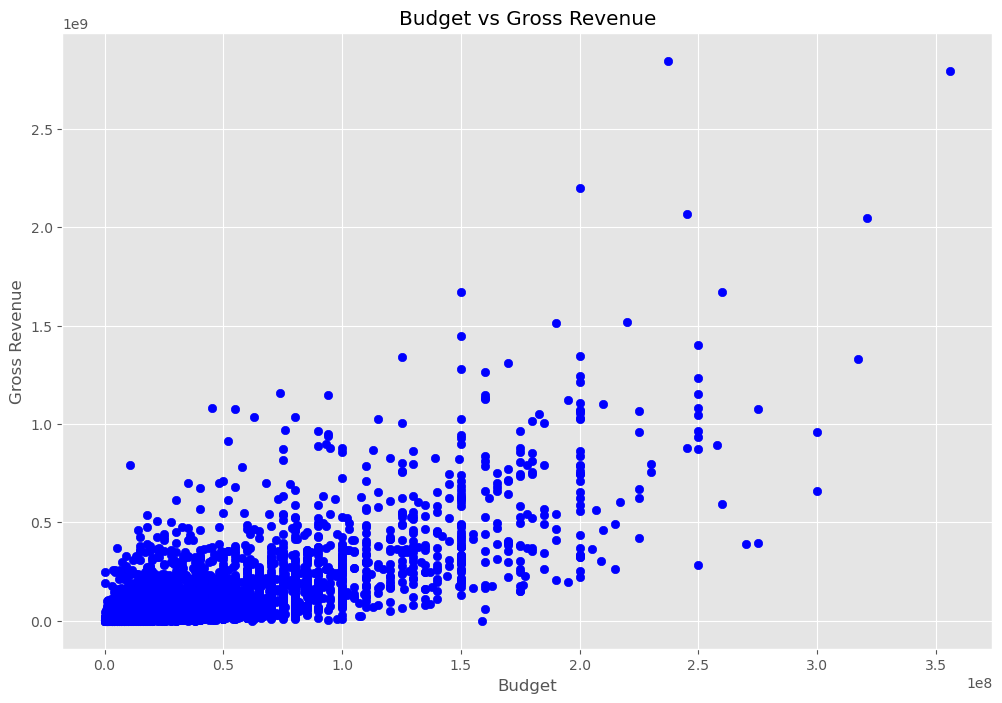

In [26]:

plt.scatter(x= df['budget'] , y= df['gross'], color='blue')

plt.title('Budget vs Gross Revenue')

plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

plt.show()

In [24]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
3733,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"Friday, December 18, 2009",162.0,7.8,Sam Worthington,1100000,James Cameron,2009,2009
5305,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"Friday, April 26, 2019",181.0,8.4,Robert Downey Jr.,903000,Christopher Markus,2019,2019
1797,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"Friday, December 19, 1997",194.0,7.8,Leonardo DiCaprio,1100000,James Cameron,1997,1997
4733,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"Friday, December 18, 2015",138.0,7.8,Daisy Ridley,876000,Lawrence Kasdan,2015,2015
5161,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"Friday, April 27, 2018",149.0,8.4,Robert Downey Jr.,897000,Christopher Markus,2018,2018


<Axes: xlabel='budget', ylabel='gross'>

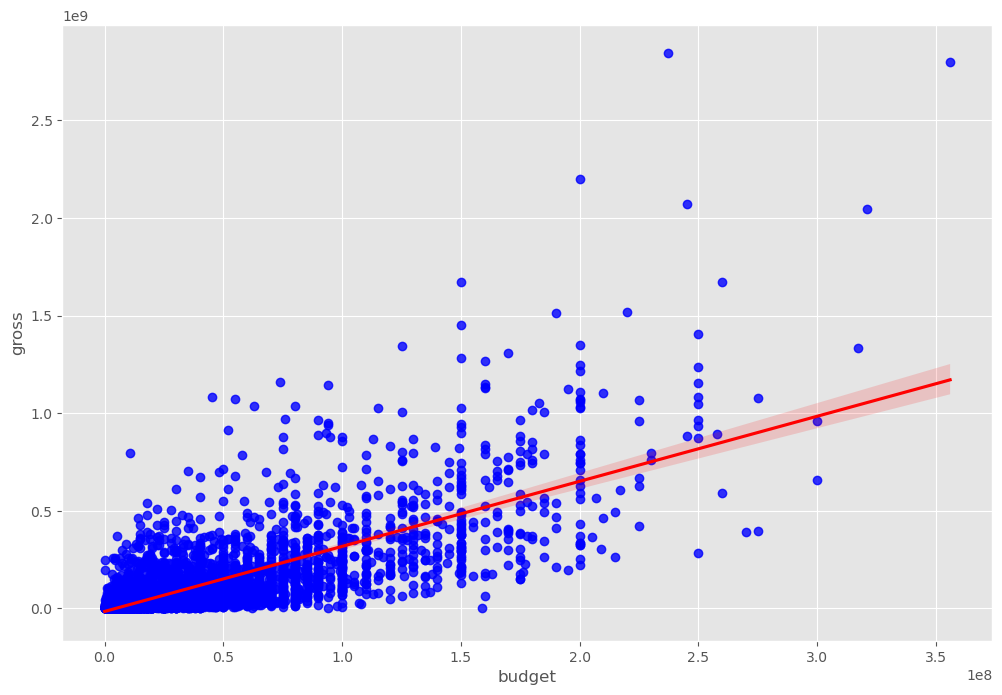

In [28]:
# check for correlation using regplot

sns.regplot(x ='budget',y= 'gross', data = df, scatter_kws = {"color":'blue'}, line_kws ={"color":'red'})


In [29]:
# we can determine there is postive correlation between gross revenue and baudget

In [32]:
# Dive more into the degree of correlation between all the featues 

df.corr(numeric_only = True , method= 'pearson') 

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740263,0.318718,0.072155,0.439757,0.327961
gross,0.740263,1.000000,0.275830,0.222709,0.614808,0.274395
runtime,0.318718,0.275830,1.000000,0.414145,0.352331,0.075173
score,0.072155,0.222709,0.414145,1.000000,0.474349,0.056506
votes,0.439757,0.614808,0.352331,0.474349,1.000000,0.206161
year,0.327961,0.274395,0.075173,0.056506,0.206161,1.000000


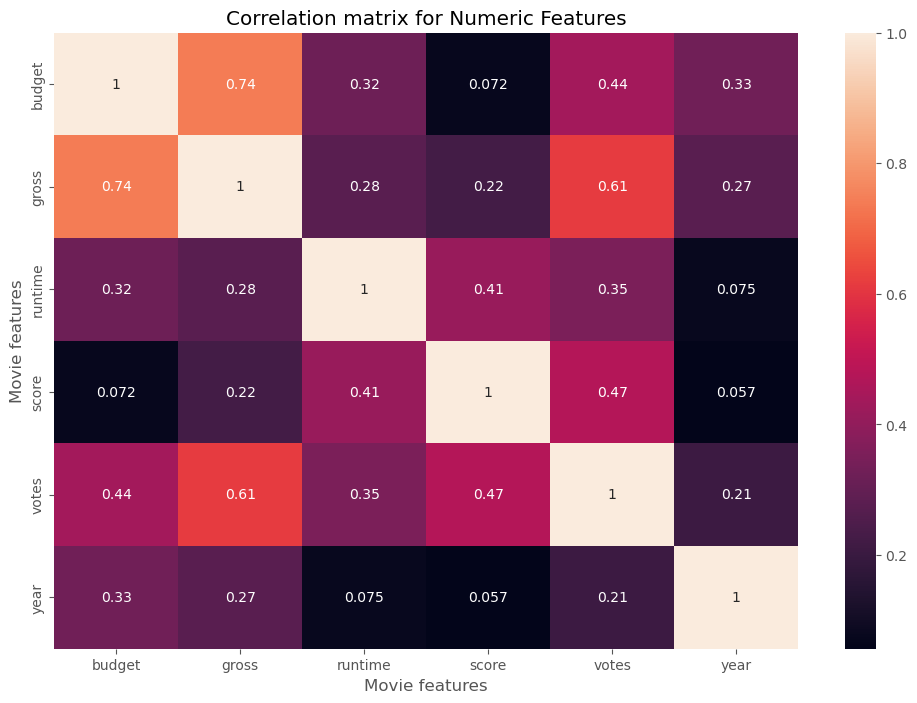

In [33]:
correlation_matrix = df.corr(numeric_only = True , method= 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [34]:
# Budget and Votes have high postive correlation with the Gross revenue  

In [35]:
# Create numeric representation of the non- numeric features to perform correlation analysis on those features 

In [36]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
3733,237000000,1382,47,785,0,2847246203,386,5,377,162.0,7.8,1534,1100000,1264,2009,30
5305,356000000,983,47,105,0,2797501328,388,5,97,181.0,8.4,1470,903000,514,2019,40
1797,200000000,1382,47,785,6,2201647264,4912,5,381,194.0,7.8,1073,1100000,1264,1997,18
4733,245000000,945,47,768,0,2069521700,3645,5,378,138.0,7.8,356,876000,1807,2015,36
5161,321000000,983,47,105,0,2048359754,389,5,103,149.0,8.4,1470,897000,514,2018,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,3000000,1385,47,585,6,5073,3796,6,1924,96.0,5.8,1498,3500,2926,2009,36
1380,5000000,1376,47,1807,0,2970,2971,5,1862,97.0,4.5,186,1900,3104,1993,15
2288,5000000,466,6,952,6,2554,1595,3,1236,108.0,6.8,527,43000,1684,2000,22
154,800000,582,47,261,9,2270,2911,6,1073,85.0,3.9,1473,2300,55,1982,3


In [37]:
#Check the new data types of our features
df.dtypes

budget           int64
company          int16
country           int8
director         int16
genre             int8
gross            int64
name             int16
rating            int8
released         int16
runtime        float64
score          float64
star             int16
votes            int64
writer           int16
year             int64
yearcorrect       int8
dtype: object

In [41]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
3733,237000000,1382,47,785,0,2847246203,386,5,377,162.0,7.8,1534,1100000,1264,2009,30
5305,356000000,983,47,105,0,2797501328,388,5,97,181.0,8.4,1470,903000,514,2019,40
1797,200000000,1382,47,785,6,2201647264,4912,5,381,194.0,7.8,1073,1100000,1264,1997,18
4733,245000000,945,47,768,0,2069521700,3645,5,378,138.0,7.8,356,876000,1807,2015,36
5161,321000000,983,47,105,0,2048359754,389,5,103,149.0,8.4,1470,897000,514,2018,39


In [42]:
# now we can create a correlation matrix for all the features

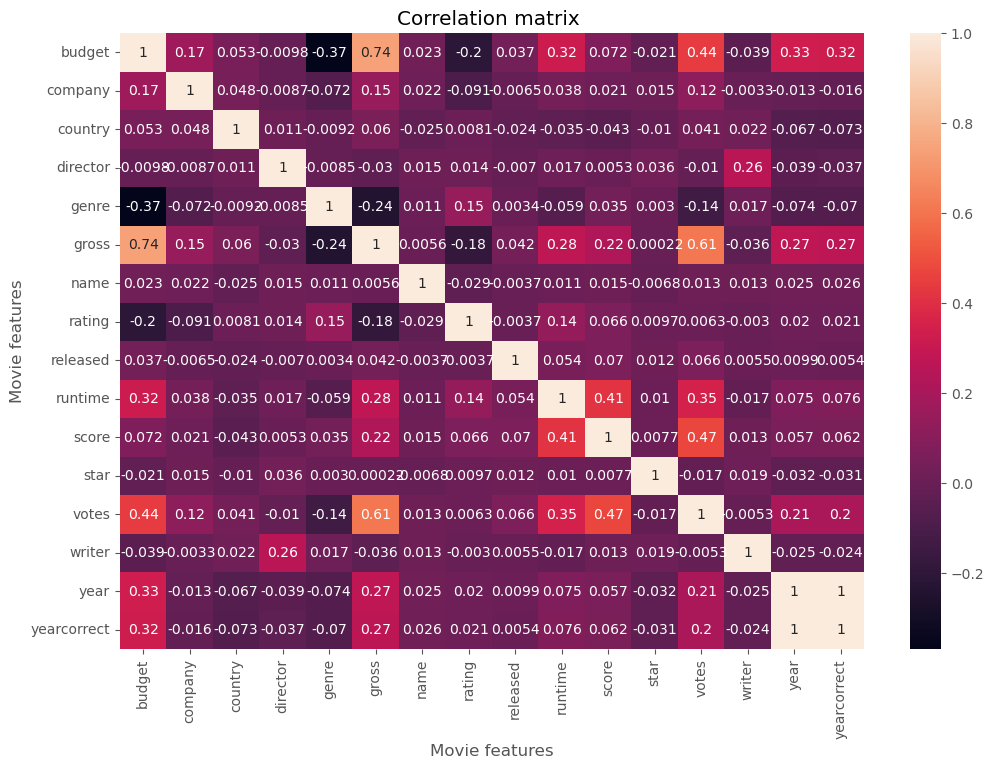

In [43]:
correlation_matrix = df_numerized.corr(method= 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix ")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [48]:
 df_numerized.corr( )

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
budget,1.000000,0.170676,0.052878,-0.009814,-0.368521,0.740263,0.023336,-0.203531,0.036508,0.318718,0.072155,-0.021159,0.439757,-0.039307,0.327961,0.321211
company,0.170676,1.000000,0.048258,-0.008712,-0.071608,0.149843,0.021592,-0.091306,-0.006464,0.037797,0.021241,0.014958,0.118850,-0.003287,-0.013187,-0.016390
country,0.052878,0.048258,1.000000,0.011209,-0.009185,0.059982,-0.025467,0.008061,-0.024217,-0.034514,-0.043207,-0.010125,0.041443,0.022496,-0.066833,-0.073305
director,-0.009814,-0.008712,0.011209,1.000000,-0.008507,-0.029664,0.015320,0.014381,-0.007039,0.017437,0.005294,0.036372,-0.010499,0.261595,-0.038676,-0.036950
genre,-0.368521,-0.071608,-0.009185,-0.008507,1.000000,-0.244034,0.010838,0.147569,0.003424,-0.059367,0.035126,0.003026,-0.135954,0.016969,-0.073532,-0.070229
gross,0.740263,0.149843,0.059982,-0.029664,-0.244034,1.000000,0.005613,-0.181590,0.041855,0.275830,0.222709,0.000218,0.614808,-0.035842,0.274395,0.269197
name,0.023336,0.021592,-0.025467,0.015320,0.010838,0.005613,1.000000,-0.029271,-0.003658,0.010949,0.014521,-0.006788,0.012585,0.013143,0.025441,0.025662
rating,-0.203531,-0.091306,0.008061,0.014381,0.147569,-0.181590,-0.029271,1.000000,-0.003715,0.140886,0.066335,0.009693,0.006321,-0.002966,0.020085,0.021423
released,0.036508,-0.006464,-0.024217,-0.007039,0.003424,0.041855,-0.003658,-0.003715,1.000000,0.053557,0.069710,0.011879,0.066182,0.005539,0.009873,0.005362
runtime,0.318718,0.037797,-0.034514,0.017437,-0.059367,0.275830,0.010949,0.140886,0.053557,1.000000,0.414145,0.010312,0.352331,-0.017340,0.075173,0.075989


In [49]:
# Organize the data , unstack

In [54]:
pd.set_option('display.max_rows', None)

In [55]:

correlation_mat = df_numerized.corr( )

corrn_pairs = correlation_mat.unstack()

corrn_pairs

budget       budget         1.000000
             company        0.170676
             country        0.052878
             director      -0.009814
             genre         -0.368521
             gross          0.740263
             name           0.023336
             rating        -0.203531
             released       0.036508
             runtime        0.318718
             score          0.072155
             star          -0.021159
             votes          0.439757
             writer        -0.039307
             year           0.327961
             yearcorrect    0.321211
company      budget         0.170676
             company        1.000000
             country        0.048258
             director      -0.008712
             genre         -0.071608
             gross          0.149843
             name           0.021592
             rating        -0.091306
             released      -0.006464
             runtime        0.037797
             score          0.021241
 

In [56]:
# sort for a better view
sorted_pairs = corrn_pairs.sort_values()

sorted_pairs

genre        budget        -0.368521
budget       genre         -0.368521
genre        gross         -0.244034
gross        genre         -0.244034
rating       budget        -0.203531
budget       rating        -0.203531
rating       gross         -0.181590
gross        rating        -0.181590
votes        genre         -0.135954
genre        votes         -0.135954
company      rating        -0.091306
rating       company       -0.091306
genre        year          -0.073532
year         genre         -0.073532
country      yearcorrect   -0.073305
yearcorrect  country       -0.073305
genre        company       -0.071608
company      genre         -0.071608
genre        yearcorrect   -0.070229
yearcorrect  genre         -0.070229
country      year          -0.066833
year         country       -0.066833
genre        runtime       -0.059367
runtime      genre         -0.059367
score        country       -0.043207
country      score         -0.043207
budget       writer        -0.039307
w

In [57]:
# identify the pairs that are highly correlated , correlation > 0.5
high_corrn = sorted_pairs[(sorted_pairs) > 0.5]

high_corrn 

gross        votes          0.614808
votes        gross          0.614808
budget       gross          0.740263
gross        budget         0.740263
yearcorrect  year           0.998212
year         yearcorrect    0.998212
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

 we can see that budget and votes are highly correlated with the gross revenue